<a href="https://colab.research.google.com/github/NerijusSh/demo/blob/main/125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Wrangling with Python
## Sprint 2: Data Processing with NumPy and Pandas
## Part 5: Top 50 Spotify Tracks of 2020


## About this Part

Congrats!
You completed almost all assignments and tasks of this Sprint.
You did a great job.
In this Part, you will need to prove all the skills that you learned.
As the final assignment of this Sprint, you will analyze the Top 50 Spotify Tracks 2020 dataset.
To complete this task, you will have to apply all that you have learned about Data Analysis, Linear Algebra, NumPy, and Pandas.

## Context

Imagine that you are a data analyst working for Spotify.
Your team is responsible for content analysis, and in this quarter, you have decided to analyze Spotify's top hits and quantify what makes a hit song.
Your team's product manager has many ideas and prepared a list of questions (requirements) that she wants you to get answers to.
After reviewing the list of over 20 questions, you are not in a good mood - you'll have to work a couple of days to get all the answers.
Luckily, a few days ago, an experienced data scientist working in your team queried the top 50 tracks for her machine learning project and agreed to share the data with you.
This is a significant help - your SQL skills are not too sharp yet, and you don't yet know where to find all the relevant tables in your data warehouse.
With this dataset, you are confident that you'll be able to answer all your PM's questions and maybe even look into some things that she didn't ask for.

## Objectives for this Part

- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice reading data, performing queries and filtering data using Pandas.

## Requirements

- Download the data from [Spotify Top 50 Tracks of 2020 dataset](https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020).
- Load the data using Pandas.
- Perform data cleaning by:
  - Handling missing values.
  - Removing duplicate samples and features.
  - Treating the outliers.
- Perform exploratory data analysis. Your analysis should provide answers to these questions:
  - How many observations are there in this dataset?
  - How many features this dataset has?
  - Which of the features are categorical?
  - Which of the features are numeric?
  - Are there any artists that have more than 1 popular track? If yes, which and how many?
  - Who was the most popular artist?
  - How many artists in total have their songs in the top 50?
  - Are there any albums that have more than 1 popular track? If yes, which and how many?
  - How many albums in total have their songs in the top 50?
  - Which tracks have a danceability score above 0.7?
  - Which tracks have a danceability score below 0.4?
  - Which tracks have their loudness above -5?
  - Which tracks have their loudness below -8?
  - Which track is the longest?
  - Which track is the shortest?
  - Which genre is the most popular?
  - Which genres have just one song on the top 50?
  - How many genres in total are represented in the top 50?
  - Which features are strongly positively correlated?
  - Which features are strongly negatively correlated?
  - Which features are not correlated?
- How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Code quality. Was your code well-structured? Did you use the correct levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What advantages do NumPy arrays have over Python lists?
- What makes computation on NumPy arrays so fast?
- What are the rules of broadcasting?
- What advantages do Pandas have over NumPy?
- What is a DataFrame in Pandas?


In [ ]:
pip install kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d atillacolak/top-50-spotify-tracks-2020

top-50-spotify-tracks-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip top-50-spotify-tracks-2020.zip

Archive:  top-50-spotify-tracks-2020.zip
replace spotifytoptracks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: spotifytoptracks.csv    


### Reading the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
spotify_df = pd.read_csv('spotifytoptracks.csv', index_col=0)

### Data cleaning

#### Removing duplicates

In [ ]:
spotify_df['track_name'].drop_duplicates(inplace=True)

In [ ]:
spotify_df = spotify_df.loc[:,~spotify_df.columns.duplicated()]

Droping duplicate tracks and duplicate features if there are any.

#### Handling missing values.

In [ ]:
spotify_df.fillna(0).head(5)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


#### Dealing with the outliers

In [ ]:
relevant_columns = ['energy','danceability','loudness','acousticness',
                    'speechiness','liveness','valence','tempo']

In [ ]:
"""Finds outliers and replaces them with values that make sense"""
for col in spotify_df[relevant_columns]:
    data = sorted(spotify_df[col])
    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)   
    IQR = q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    for value in spotify_df[col]:
        if value<lower_bound:
            spotify_df[col].replace(value, tenth_percentile, inplace=True)
        if value>upper_bound:
            spotify_df[col].replace(value, ninetieth_percentile, inplace=True)

### Exploratory data analysis

- How many observations are there in this dataset?

In [ ]:
observations = len(spotify_df.index)
observations

50

- How many features this dataset has?

In [ ]:
features = len(spotify_df.columns)
features

16

- Which of the features are numeric?

In [ ]:
numeric_features = list(spotify_df._get_numeric_data().columns)
numeric_features

['energy',
 'danceability',
 'key',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

- Which of the features are categorical?

In [ ]:
categorical_features = list(set(spotify_df.columns)-set(numeric_features))
categorical_features

['artist', 'genre', 'album', 'track_id', 'track_name']

- Are there any artists that have more than 1 popular track? If yes, which and how many?

In [ ]:
popular_artists = spotify_df[spotify_df.duplicated(['artist'], keep = False)]
popular_artists['artist'].value_counts()

Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Justin Bieber    2
Name: artist, dtype: int64

- Who was the most popular artist?

In [ ]:
most_popular_artist = spotify_df.iloc[0]['artist']
most_popular_artist

'The Weeknd'

- How many artists in total have their songs in the top 50?

In [ ]:
amount_of_artists = spotify_df['artist'].nunique()
amount_of_artists

40

- Are there any albums that have more than 1 popular track? If yes, which and how many?

In [ ]:
popular_albums = spotify_df[spotify_df.duplicated(['album'], keep = False)]
popular_albums['album'].value_counts()

Future Nostalgia        3
Changes                 2
Hollywood's Bleeding    2
Fine Line               2
Name: album, dtype: int64

- How many albums in total have their songs in the top 50?

In [ ]:
amount_of_albums = spotify_df['album'].nunique()
amount_of_albums

45

- Which tracks have a danceability score above 0.7?

In [ ]:
spotify_df['track_name'].loc[spotify_df['danceability']>0.7].to_list()

['Dance Monkey',
 'The Box',
 'Roses - Imanbek Remix',
 "Don't Start Now",
 'ROCKSTAR (feat. Roddy Ricch)',
 'death bed (coffee for your head)',
 'Falling',
 'Tusa',
 'Blueberry Faygo',
 'Intentions (feat. Quavo)',
 'Toosie Slide',
 'Say So',
 'Memories',
 'Life Is Good (feat. Drake)',
 'Savage Love (Laxed - Siren Beat)',
 'Breaking Me',
 'everything i wanted',
 'Señorita',
 'bad guy',
 'WAP (feat. Megan Thee Stallion)',
 'Sunday Best',
 'Godzilla (feat. Juice WRLD)',
 'Break My Heart',
 'Dynamite',
 'Supalonely (feat. Gus Dapperton)',
 'Sunflower - Spider-Man: Into the Spider-Verse',
 'Hawái',
 'Ride It',
 'goosebumps',
 'RITMO (Bad Boys For Life)',
 'THE SCOTTS',
 'SICKO MODE']

- Which tracks have a danceability score below 0.4?

In [ ]:
spotify_df['track_name'].loc[spotify_df['danceability']<0.4]


Series([], Name: track_name, dtype: object)

In the initial DataFrame there is 1 track with danceability <0.4, but after treating the outliers there is 0 tracks.

- Which tracks have their loudness above -5?

In [ ]:
spotify_df['track_name'].loc[spotify_df['loudness']>(-5)].to_list()

["Don't Start Now",
 'Watermelon Sugar',
 'Tusa',
 'Circles',
 'Before You Go',
 'Say So',
 'Adore You',
 'Mood (feat. iann dior)',
 'Break My Heart',
 'Dynamite',
 'Supalonely (feat. Gus Dapperton)',
 'Rain On Me (with Ariana Grande)',
 'Sunflower - Spider-Man: Into the Spider-Verse',
 'Hawái',
 'Ride It',
 'goosebumps',
 'Safaera',
 'Physical',
 'SICKO MODE']

- Which tracks have their loudness below -8?

In [ ]:
spotify_df['track_name'].loc[spotify_df['loudness']<(-8)].to_list()

['death bed (coffee for your head)',
 'Falling',
 'Toosie Slide',
 'Savage Love (Laxed - Siren Beat)',
 'everything i wanted',
 'bad guy',
 'HIGHEST IN THE ROOM',
 'lovely (with Khalid)',
 'If the World Was Ending - feat. Julia Michaels']

- Which track is the longest?

In [ ]:
longest_song = spotify_df['track_name'].iloc[spotify_df['duration_ms'].idxmax()]
longest_song

'SICKO MODE'

- Which track is the shortest?

In [ ]:
shortest_song = spotify_df['track_name'].iloc[spotify_df['duration_ms'].idxmin()]
shortest_song

'Mood (feat. iann dior)'

- Which genre is the most popular?

In [ ]:
most_popular_genre = spotify_df['genre'].value_counts().idxmax()
most_popular_genre

'Pop'

- Which genres have just one song on the top 50?

In [ ]:
one_song_genres = spotify_df['genre'].value_counts().loc[lambda x: x==1].index
one_song_genres.to_list()

['Pop rap',
 'Pop/Soft Rock',
 'Hip-Hop/Trap',
 'Alternative/reggaeton/experimental',
 'Dance-pop/Disco',
 'Disco-pop',
 'Chamber pop',
 'Dreampop/Hip-Hop/R&B',
 'R&B/Hip-Hop alternative',
 'Nu-disco']

- How many genres in total are represented in the top 50?

In [ ]:
all_genres = spotify_df['genre'].value_counts().index.nunique()
all_genres

16

- Which features are strongly positively correlated?

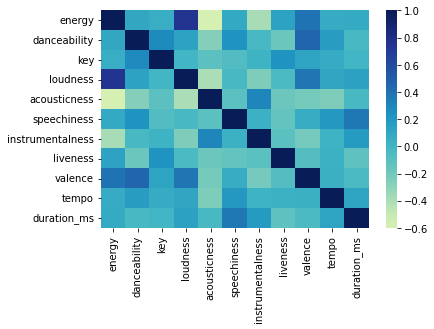

In [ ]:
correlations = spotify_df.corr()
sns.heatmap(correlations, vmin=-0.6, vmax=1, center=0, cmap="YlGnBu")
plt.show()

Correlations heatmap

In [ ]:
corr_matrix = spotify_df[relevant_columns].corr()
corr_series = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
              .astype(bool)).stack().sort_values(ascending=False))
strongly_positively_corr = corr_series.idxmax()
strongly_positively_corr

('energy', 'loudness')

Energy and loudness are strongly positively correlated.

- Which features are strongly negatively correlated?

In [ ]:
strongly_negatively_corr = corr_series.idxmin()
strongly_negatively_corr

('energy', 'acousticness')

Energy and acousticness are strongly negatively correlated.

- Which features are not correlated?

In [ ]:
for index, corr_value in corr_series.items():
    if corr_value<0.2 and corr_value>-0.2:
        print(index)

('speechiness', 'tempo')
('danceability', 'tempo')
('energy', 'liveness')
('danceability', 'loudness')
('loudness', 'tempo')
('energy', 'danceability')
('energy', 'speechiness')
('energy', 'tempo')
('speechiness', 'valence')
('valence', 'tempo')
('liveness', 'tempo')
('loudness', 'speechiness')
('loudness', 'liveness')
('liveness', 'valence')
('acousticness', 'speechiness')
('speechiness', 'liveness')
('danceability', 'liveness')
('acousticness', 'liveness')


These are the features which correlation value is lower than 0.2 and higher than -0.2 (close to 0).

- How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
selected_genres = ['Pop','Hip-Hop/Rap','Dance/Electronic','Alternative/Indie']
selected_genres_df = spotify_df[spotify_df['genre'].isin(selected_genres)]
danceability_scores = (selected_genres_df['danceability']
                       .groupby(selected_genres_df['genre']).mean().to_frame())
danceability_scores

,danceability
genre,
Alternative/Indie,0.675425
Dance/Electronic,0.755000
Hip-Hop/Rap,0.765538
Pop,0.681121


DataFrame of danceability scores comparison. 
Hip-Hop/Rap has the highest danceability score and Alternative/Indie has the lowest.

- How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
loudness_scores = (selected_genres_df['loudness']
                   .groupby(selected_genres_df['genre']).mean().to_frame())
loudness_scores

,loudness
genre,
Alternative/Indie,-5.421000
Dance/Electronic,-5.338000
Hip-Hop/Rap,-6.917846
Pop,-6.054393


Loudness scores DataFrame. Hip-Hop/Rap has the lowest loudness score and Dance/Electronic has the highest score.

- How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
acousticness_scores = (selected_genres_df['acousticness']
                       .groupby(selected_genres_df['genre']).mean().to_frame())
acousticness_scores

,acousticness
genre,
Alternative/Indie,0.590250
Dance/Electronic,0.099440
Hip-Hop/Rap,0.188895
Pop,0.294843


Acousticness score DataFrame. Alternative/Indie has the highest acousticness score and Hip-Hop/Rap has the lowest.

### What could be improved
- Histograms for the last 3 score comparisons so it is more clear how the scores compare to each other.
- Probably code could be written more efficiently with less functions.
- Not sure if my method of dealing with the outliers is a correct way to do it, because in the "Which tracks have a danceability score below 0.4?" question track with score below 0.4 disappears.
- Not sure what is the value of correlation for two columns to not be correlated at all (I put 0.2 and -0.2).